In [10]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import hnn_core
from hnn_core import (MPIBackend, jones_2009_model, simulate_dipole,
                      read_dipole)
from hnn_core.viz import plot_dipole
from scipy.stats import norm

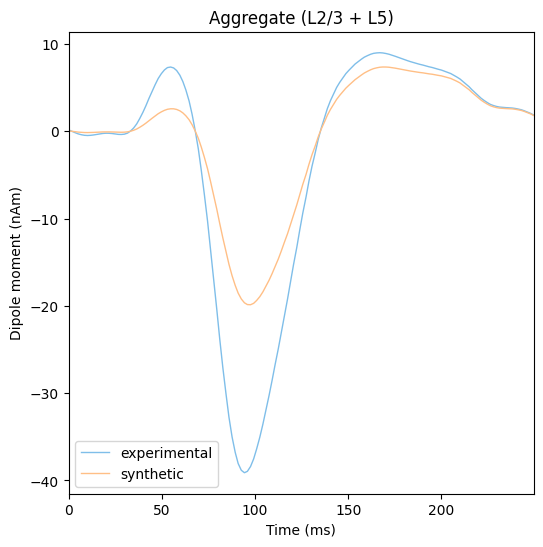

In [14]:
# Load experimental biomarker
dipole_experimental = read_dipole('../data/L_Contra.txt')
times = dipole_experimental.times

# Copy and store data in numpy array
dipole_synthetic = dipole_experimental.copy()
dpl_data = dipole_synthetic.data['agg']

# Create gaussian window
biomarker_scale = 0.3
gauss = norm.pdf(times, loc=20, scale=90)
gauss = (gauss / np.max(gauss)) * (biomarker_scale - 1)
gauss += 1  # Offset by 1 so that multiplying at tails has no effect

# Scale and re-assign data to Dipole object
dpl_data = dpl_data * gauss
dipole_synthetic.data['agg'] = dpl_data

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
dipole_experimental.plot(ax=ax, layer='agg', show=False,
                         color='tab:blue')
dipole_synthetic.plot(ax=ax, layer='agg', show=False,
                         color='tab:orange')
ax.legend(['experimental', 'synthetic'])

In [15]:
dipole_synthetic.write('../data/post-treatment_erp.txt')